# Project: Wrangling and Analyze Data

## Data Gathering
This project uses three datasets and engages in a process of cleaning and preparing all three, before combining them into one large dataset for the purpose of analysis.

There is a short report containing some insights from the analysis.

**All data was obtained from Udacity.**

### Programmatic downloading:

Directly downloading the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

twitter_archive_enhanced = pd.read_csv(r"C:\Users\joelh\Downloads\twitter-archive-enhanced.csv")

In [3]:
image_predictions = pd.read_csv(r"C:\Users\joelh\Downloads\image-predictions.tsv")

The third dataset was also provided by Udacity, and was queried from Twitter using the Tweepy library via the Twitter API.

As I could not create a Twitter developer account I have used the data provided by Udacity. Code from Udacity is copied below, as Udacity required.

import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

### Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
### These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

### NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
### df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
### change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
### NOTE TO REVIEWER: this student had mobile verification issues so the following
### Twitter API code was sent to this student from a Udacity instructor
### Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_1.tweet_id.values
len(tweet_ids)

### Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
### Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

Now extracting the zip file provided:

In [4]:
import zipfile

with zipfile.ZipFile('tweet-json.zip') as z:
    z.extractall()
    
import json
dataset = []
for line in open('tweet-json copy', 'r'):
    dataset.append(json.loads(line))
    
tweet_json = pd.DataFrame(dataset)

## Assessing Data Quality and Tidiness
In this section, I detect and document at least **eight (8) quality issues and two (2) tidiness issue**. 

The assessment contains both visual and programmatic assessments.

Some issues were already highlighted:

* We only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.

* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.

* We do not need to gather the tweets beyond August 1st, 2017. As we would not have access to the algorithm used to make the predictions beyond this date, it would not be much use to us.



In [5]:
tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


In [6]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
twitter_archive_enhanced[['doggo','floofer','pupper','puppo']].value_counts()

doggo  floofer  pupper  puppo
None   None     None    None     1976
                pupper  None      245
doggo  None     None    None       83
None   None     None    puppo      29
doggo  None     pupper  None       12
None   floofer  None    None        9
doggo  None     None    puppo       1
       floofer  None    None        1
dtype: int64

In [8]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [9]:
twitter_archive_enhanced['timestamp']

0       2017-08-01 16:23:56 +0000
1       2017-08-01 00:17:27 +0000
2       2017-07-31 00:18:03 +0000
3       2017-07-30 15:58:51 +0000
4       2017-07-29 16:00:24 +0000
                  ...            
2351    2015-11-16 00:24:50 +0000
2352    2015-11-16 00:04:52 +0000
2353    2015-11-15 23:21:54 +0000
2354    2015-11-15 23:05:30 +0000
2355    2015-11-15 22:32:08 +0000
Name: timestamp, Length: 2356, dtype: object

In [10]:
twitter_archive_enhanced[['rating_numerator', 'rating_denominator']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   rating_numerator    2356 non-null   int64
 1   rating_denominator  2356 non-null   int64
dtypes: int64(2)
memory usage: 36.9 KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   created_at                     2354 non-null   object 
 1   id                             2354 non-null   int64  
 2   id_str                         2354 non-null   object 
 3   full_text                      2354 non-null   object 
 4   truncated                      2354 non-null   bool   
 5   display_text_range             2354 non-null   object 
 6   entities                       2354 non-null   object 
 7   extended_entities              2073 non-null   object 
 8   source                         2354 non-null   object 
 9   in_reply_to_status_id          78 non-null     float64
 10  in_reply_to_status_id_str      78 non-null     object 
 11  in_reply_to_user_id            78 non-null     float64
 12  in_reply_to_user_id_str        78 non-null     o

In [12]:
tweet_json['full_text'][1]

"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV"

### Quality issues
1. Retweeted images are present in twitter_archive_enhanced.

2. Non-descriptive headers on the relevant columns of data.

3. The relevant variable tweet id does not have the same names in tweet_json and twitter_archive_enhanced.

4. Timestamp column in twitter_archive_enhanced is unparsed. Created_at column in tweet_json is unparsed.

5. Column names timestamp and created_at do not match.

6. Decimals in the ratings have not been extracted properly.

7. Dog names have not been correctly recorded.

8. Find and update incorrect ratings.

### Tidiness issues
1. The two files twitter_archive_enhanced and tweet_json are not combined into one file with all the relevant data.

2. In twitter_archive_enhanced, the variable 'dog stage' is separated into four columns: 'doggo', 'floofer', 'pupper' and 'puppo'.

## Cleaning Data
Now to clean the issues highlighted above.

The goal is to merge individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html).

In [13]:
# Make copies of original pieces of data for the purpose of cleaning
tweet_json_copy = tweet_json.copy()

In [14]:
twitter_archive_enhanced_copy = twitter_archive_enhanced.copy()

### Dealing with Quality Issue #3:

#### Define:

The columns contained tweet id do not have the same name in the two files above.

#### Code:

In [15]:
twitter_archive_enhanced_copy.rename(columns={'tweet_id':'tweet_id'}, inplace=True)

In [16]:
tweet_json_copy.rename(columns={'id': 'tweet_id'}, inplace=True)

#### Test

In [17]:
tweet_json_copy.head()

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,892420643555336193,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,False,False,en,NaN,NaN,NaN,NaN
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,892177421306343426,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,False,False,en,NaN,NaN,NaN,NaN
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,False,False,en,NaN,NaN,NaN,NaN
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,False,False,en,NaN,NaN,NaN,NaN
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,False,False,en,NaN,NaN,NaN,NaN


### Dealing with Tidiness Issue #1:

#### Define

Both twitter_archive_enhanced_copy and tweet_json_copy should be combined based on tweet_id.

#### Code

In [18]:
twitter_data = twitter_archive_enhanced_copy.merge(tweet_json_copy, how = 'inner', on='tweet_id')

#### Test

In [19]:
twitter_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 47 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   tweet_id                       2354 non-null   int64  
 1   in_reply_to_status_id_x        78 non-null     float64
 2   in_reply_to_user_id_x          78 non-null     float64
 3   timestamp                      2354 non-null   object 
 4   source_x                       2354 non-null   object 
 5   text                           2354 non-null   object 
 6   retweeted_status_id            179 non-null    float64
 7   retweeted_status_user_id       179 non-null    float64
 8   retweeted_status_timestamp     179 non-null    object 
 9   expanded_urls                  2295 non-null   object 
 10  rating_numerator               2354 non-null   int64  
 11  rating_denominator             2354 non-null   int64  
 12  name                           2354 non-null   o

In [20]:
twitter_relevant_data = twitter_data[['favorite_count',
'retweet_count',
'quoted_status_id',
'retweeted_status',
'doggo',
'floofer',
'puppo',
'pupper',
'retweeted_status_id',
'lang',
'full_text',
'entities',
'created_at',
'timestamp',
'rating_numerator',
'rating_denominator',
'text']]

#### Test:

In [21]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,lang,full_text,entities,created_at,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Tue Aug 01 16:23:56 +0000 2017,2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",Tue Aug 01 00:17:27 +0000 2017,2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Mon Jul 31 00:18:03 +0000 2017,2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",Sun Jul 30 15:58:51 +0000 2017,2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",Sat Jul 29 16:00:24 +0000 2017,2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Quality Issue #5

#### Define:

The columns created_at and timestamp need to be merged into one timestamp column. Drop the created_at column.

#### Code:

In [22]:
twitter_relevant_data = twitter_relevant_data.drop('created_at',axis=1)

#### Test:

In [23]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,lang,full_text,entities,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Quality Issue #2:

#### Define:

Rename the following non-descriptive headers with the following names:

{'lang':'language'}

There were initially many more non-descriptive headers but those have been dropped as they were irrelevant to the analysis later.

#### Code:

In [24]:
twitter_relevant_data.rename(columns = {'lang':'language'}, inplace=True)

#### Test:

In [25]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,doggo,floofer,puppo,pupper,retweeted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text
0,39467,8853,NaN,NaN,None,None,None,None,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56 +0000,13,10,This is Phineas. He's a mystical boy. Only eve...
1,33819,6514,NaN,NaN,None,None,None,None,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27 +0000,13,10,This is Tilly. She's just checking pup on you....
2,25461,4328,NaN,NaN,None,None,None,None,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03 +0000,12,10,This is Archie. He is a rare Norwegian Pouncin...
3,42908,8964,NaN,NaN,None,None,None,None,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51 +0000,13,10,This is Darla. She commenced a snooze mid meal...
4,41048,9774,NaN,NaN,None,None,None,None,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24 +0000,12,10,This is Franklin. He would like you to stop ca...


## Quality Issue #4:

#### Define:

The timestamp column is not parsed in a datetime format.

#### Code:

In [26]:
twitter_relevant_data['timestamp'] = pd.to_datetime(twitter_relevant_data.timestamp)

#### Test:

In [27]:
twitter_relevant_data.timestamp

0      2017-08-01 16:23:56+00:00
1      2017-08-01 00:17:27+00:00
2      2017-07-31 00:18:03+00:00
3      2017-07-30 15:58:51+00:00
4      2017-07-29 16:00:24+00:00
                  ...           
2349   2015-11-16 00:24:50+00:00
2350   2015-11-16 00:04:52+00:00
2351   2015-11-15 23:21:54+00:00
2352   2015-11-15 23:05:30+00:00
2353   2015-11-15 22:32:08+00:00
Name: timestamp, Length: 2354, dtype: datetime64[ns, UTC]

## Tidiness Issue #2:

#### Define:

Merging the columns doggo, pupper, puppo, floofer into one column "dog stage".

#### Code:

In [28]:
twitter_relevant_data['dog_stage'] = twitter_relevant_data.doggo + twitter_relevant_data.puppo + twitter_relevant_data.pupper + twitter_relevant_data.floofer

In [29]:
twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggoNoneNoneNone', 'dog_stage'] = 'doggo'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNoneNoneNone', 'dog_stage'] = 'None'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NonepuppoNoneNone', 'dog_stage'] = 'puppo'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='doggoNonepupperNone', 'dog_stage'] = 'None'

twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggoNoneNonefloofer', 'dog_stage'] = 'None'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage == 'doggopuppoNoneNone', 'dog_stage'] = 'None'



twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNoneNonefloofer', 'dog_stage'] = 'floofer'
twitter_relevant_data.loc[twitter_relevant_data.dog_stage =='NoneNonepupperNone', 'dog_stage'] = 'pupper'

In [30]:
twitter_relevant_data = twitter_relevant_data.drop(['pupper', 'doggo', 'puppo', 'floofer'], axis=1)

#### Test:

In [31]:
twitter_relevant_data['dog_stage'].value_counts()

None       1989
pupper      244
doggo        83
puppo        29
floofer       9
Name: dog_stage, dtype: int64

In [32]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,retweeted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text,dog_stage
0,39467,8853,NaN,NaN,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56+00:00,13,10,This is Phineas. He's a mystical boy. Only eve...,None
1,33819,6514,NaN,NaN,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27+00:00,13,10,This is Tilly. She's just checking pup on you....,None
2,25461,4328,NaN,NaN,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03+00:00,12,10,This is Archie. He is a rare Norwegian Pouncin...,None
3,42908,8964,NaN,NaN,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51+00:00,13,10,This is Darla. She commenced a snooze mid meal...,None
4,41048,9774,NaN,NaN,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24+00:00,12,10,This is Franklin. He would like you to stop ca...,None


## Quality Issue #6: 

#### Define:

Ratings with decimals have been extracted incorrectly.

#### Code:

In [33]:
ratings = twitter_relevant_data.text.str.extract('((?:\d+\.)?\d+)\/(\d+)', expand=True).astype(float)

In [34]:
ratings.head()

,0,1
0,13.0,10.0
1,13.0,10.0
2,12.0,10.0
3,13.0,10.0
4,12.0,10.0


In [35]:
ratings.tail()

,0,1
2349,5.0,10.0
2350,6.0,10.0
2351,9.0,10.0
2352,7.0,10.0
2353,8.0,10.0


In [36]:
ratings[0]

0       13.0
1       13.0
2       12.0
3       13.0
4       12.0
        ... 
2349     5.0
2350     6.0
2351     9.0
2352     7.0
2353     8.0
Name: 0, Length: 2354, dtype: float64

Replacing the rating numerator and rating denominator columns with the new ratings:

In [37]:
twitter_relevant_data.rating_numerator = ratings[0]
twitter_relevant_data.rating_denominator = ratings[1]

**Test**:

In [38]:
twitter_relevant_data.head()

,favorite_count,retweet_count,quoted_status_id,retweeted_status,retweeted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text,dog_stage
0,39467,8853,NaN,NaN,NaN,en,This is Phineas. He's a mystical boy. Only eve...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 16:23:56+00:00,13.0,10.0,This is Phineas. He's a mystical boy. Only eve...,None
1,33819,6514,NaN,NaN,NaN,en,This is Tilly. She's just checking pup on you....,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-08-01 00:17:27+00:00,13.0,10.0,This is Tilly. She's just checking pup on you....,None
2,25461,4328,NaN,NaN,NaN,en,This is Archie. He is a rare Norwegian Pouncin...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-31 00:18:03+00:00,12.0,10.0,This is Archie. He is a rare Norwegian Pouncin...,None
3,42908,8964,NaN,NaN,NaN,en,This is Darla. She commenced a snooze mid meal...,"{'hashtags': [], 'symbols': [], 'user_mentions...",2017-07-30 15:58:51+00:00,13.0,10.0,This is Darla. She commenced a snooze mid meal...,None
4,41048,9774,NaN,NaN,NaN,en,This is Franklin. He would like you to stop ca...,"{'hashtags': [{'text': 'BarkWeek', 'indices': ...",2017-07-29 16:00:24+00:00,12.0,10.0,This is Franklin. He would like you to stop ca...,None


## Quality Issue #1:

#### Define:

The retweeted rows need to be dropped.


#### Code:

In [39]:
twitter_relevant_data['retweeted_status'].values

array([nan, nan, nan, ..., nan, nan, nan], dtype=object)

In [40]:
twitter_relevant_data = twitter_relevant_data[twitter_relevant_data['retweeted_status'].isnull()]

In [41]:
twitter_relevant_data = twitter_relevant_data.drop(['retweeted_status', 'retweeted_status_id'], axis=1)

#### Test:

In [42]:
twitter_relevant_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2353
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   favorite_count      2175 non-null   int64              
 1   retweet_count       2175 non-null   int64              
 2   quoted_status_id    28 non-null     float64            
 3   language            2175 non-null   object             
 4   full_text           2175 non-null   object             
 5   entities            2175 non-null   object             
 6   timestamp           2175 non-null   datetime64[ns, UTC]
 7   rating_numerator    2175 non-null   float64            
 8   rating_denominator  2175 non-null   float64            
 9   text                2175 non-null   object             
 10  dog_stage           2175 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(3), int64(2), object(5)
memory usage: 203.9+ KB


## Quality Issue #7:

### Define:

Removing non-dog words from the dog names column.

### Code:

In [43]:
type(twitter_relevant_data.dog_stage[0])

str

In [44]:
mask = twitter_relevant_data.dog_stage.str.contains('^[a-z]', regex = True)
twitter_relevant_data[mask].dog_stage.value_counts().sort_index()

doggo       75
floofer      9
pupper     224
puppo       24
Name: dog_stage, dtype: int64

## Quality Issue #8:

### Define:

The incorrect ratings must be found and updated or removed (if the correct rating cannot be inferred from the tweet).

### Code:

Incorrect ratings may have a rating denominator not equal to 10. So we can select these rows. 

It turns out there are quite a few. Selecting the rows and the full tweet text:

In [45]:
# Set the dataframe to display the full content of each tweet
pd.set_option('display.max_colwidth',None)
twitter_relevant_data[twitter_relevant_data.rating_denominator != 10][['rating_numerator','rating_denominator', 'full_text']]

,rating_numerator,rating_denominator,full_text
312,960.0,0.0,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho"
341,11.0,15.0,@docmisterio account started on 11/15/15
432,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
515,24.0,7.0,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
900,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1066,9.0,11.0,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ"
1118,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1163,4.0,20.0,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a
1200,50.0,50.0,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq
1226,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1


In [46]:
twitter_relevant_data.at[312, 'rating_numerator'] = 13
twitter_relevant_data.at[312, 'rating_denominator'] = 10
twitter_relevant_data = twitter_relevant_data.drop(341)
twitter_relevant_data = twitter_relevant_data.drop(515)
twitter_relevant_data.at[1066, 'rating_numerator'] = 14
twitter_relevant_data.at[1066, 'rating_denominator'] = 10
twitter_relevant_data.at[1163, 'rating_numerator'] = 13
twitter_relevant_data.at[1163, 'rating_denominator'] = 10
twitter_relevant_data.at[1200, 'rating_numerator'] = 11
twitter_relevant_data.at[1200, 'rating_denominator'] = 10
twitter_relevant_data.at[1660, 'rating_numerator'] = 10
twitter_relevant_data.at[1660, 'rating_denominator'] = 10
twitter_relevant_data = twitter_relevant_data.drop(1596)
twitter_relevant_data = twitter_relevant_data.drop(1661)
twitter_relevant_data.at[2333, 'rating_numerator'] = 9
twitter_relevant_data.at[2333, 'rating_denominator'] = 10

### Test:

In [47]:
# Set the dataframe to display the full content of each tweet
pd.set_option('display.max_colwidth',None)
twitter_relevant_data[twitter_relevant_data.rating_denominator != 10][['rating_numerator','rating_denominator', 'full_text']]

,rating_numerator,rating_denominator,full_text
432,84.0,70.0,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd
900,165.0,150.0,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE
1118,204.0,170.0,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv
1226,99.0,90.0,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1
1252,80.0,80.0,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12
1272,45.0,50.0,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK"
1349,60.0,50.0,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa
1431,44.0,40.0,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ
1632,143.0,130.0,"Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you https://t.co/kRK51Y5ac3"
1633,121.0,110.0,Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110 https://t.co/1zfnTJLt55


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [48]:
twitter_relevant_data.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [49]:
dataset = pd.read_csv('twitter_archive_master.csv')

In [50]:
dataset.head()

,favorite_count,retweet_count,quoted_status_id,language,full_text,entities,timestamp,rating_numerator,rating_denominator,text,dog_stage
0,39467,8853,NaN,en,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892420639486877696, 'id_str': '892420639486877696', 'indices': [86, 109], 'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg', 'url': 'https://t.co/MgUWQ76dJU', 'display_url': 'pic.twitter.com/MgUWQ76dJU', 'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 540, 'h': 528, 'resize': 'fit'}, 'medium': {'w': 540, 'h': 528, 'resize': 'fit'}}}]}",2017-08-01 16:23:56+00:00,13.0,10.0,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,None
1,33819,6514,NaN,en,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV","{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 892177413194625024, 'id_str': '892177413194625024', 'indices': [139, 162], 'media_url': 'http://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg', 'url': 'https://t.co/0Xxu71qeIV', 'display_url': 'pic.twitter.com/0Xxu71qeIV', 'expanded_url': 'https://twitter.com/dog_rates/status/892177421306343426/photo/1', 'type': 'photo', 'sizes': {'large': {'w': 1407, 'h': 1600, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'small': {'w': 598, 'h': 680, 'resize': 'fit'}, 'medium': {'w': 1055, 'h': 1200, 'resize': 'fit'}}}]}",2017-08-01 00:17:27+00:00,13.0,10.0,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",None
2,25461,4328,NaN,en,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891815175371796480, 'id_str': '891815175371796480', 'indices': [122, 145], 'media_url': 'http://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg', 'url': 'https://t.co/wUnZnhtVJB', 'display_url': 'pic.twitter.com/wUnZnhtVJB', 'expanded_url': 'https://twitter.com/dog_rates/status/891815181378084864/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}}]}",2017-07-31 00:18:03+00:00,12.0,10.0,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,None
3,42908,8964,NaN,en,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,"{'hashtags': [], 'symbols': [], 'user_mentions': [], 'urls': [], 'media': [{'id': 891689552724799489, 'id_str': '891689552724799489', 'indices': [80, 103], 'media_url': 'http://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'media_url_https': 'https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg', 'url': 'https://t.co/tD36da7qLQ', 'display_url': 'pic.twitter.com/tD36da7qLQ', 'expanded_url': 'https://twitter.com/dog_rates/status/891689557279858688/photo/1', 'type': 'photo', 'sizes': {'medium': {'w': 901, 'h': 1200, 'resize': 'fit'}, 'thumb': {'w': 150, 'h': 150, 'resize': 'crop'}, 'large': {'w': 1201, 'h': 1600, 'resize': 'fit'}, 'small': {'w': 510, 'h': 680, 'resize': 'fit'}}

### Insights:

Now for some analysis with the cleaned dataset.

First we can explore three variables using a scatter matrix:

Text(0.5, 0.98, 'Scatter Matrix of Favourite Count, Retweet Count and Rating Numerator')

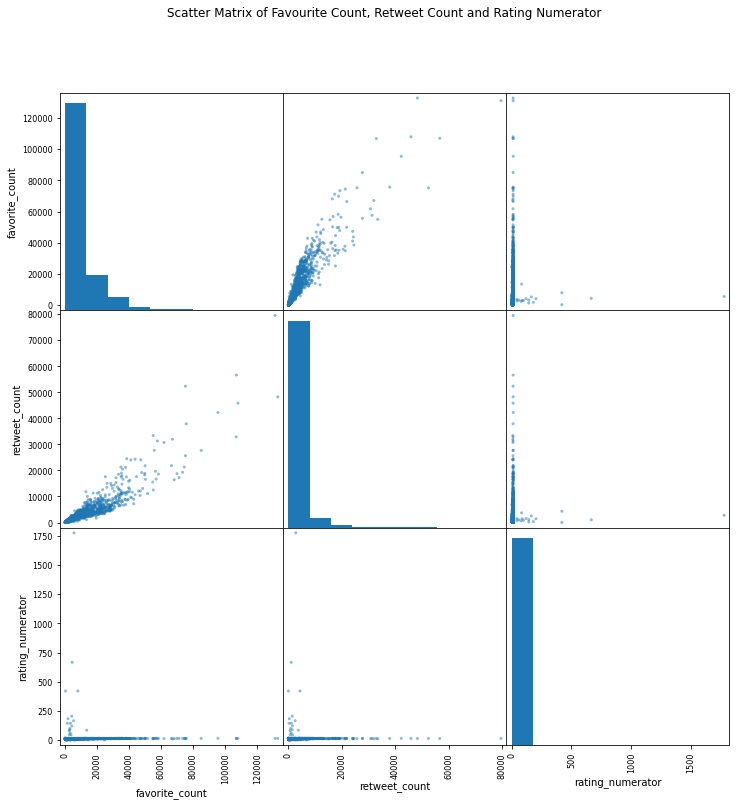

In [51]:
from pandas.plotting import scatter_matrix

features = ['favorite_count', 'retweet_count', 'rating_numerator']

scatter_matrix(dataset[features], figsize=(12,12))
plt.suptitle('Scatter Matrix of Favourite Count, Retweet Count and Rating Numerator')

*Observations:*

*N.B.* the rating numerator was used because rating denominators are set to 10. So the distribution of the rating numerator should match the distribution of the rating.

1. The correlation between favourite count and retweet count is very strong.
2. There is no relationship between rating and either type of count. This shows that user ratings do not actually reflect the value attributed to the tweets by the actual users. It's likely the rating is a feature which users enjoy because they enjoy rating tweets, rather than because the ratings themselves mean anything.

*Question: do favourite count and retweet count follow similar distributions?*

Below, the distributions of favourite count and retweet count are visualized simultaneously.

Text(0, 0.5, 'Probability Density')

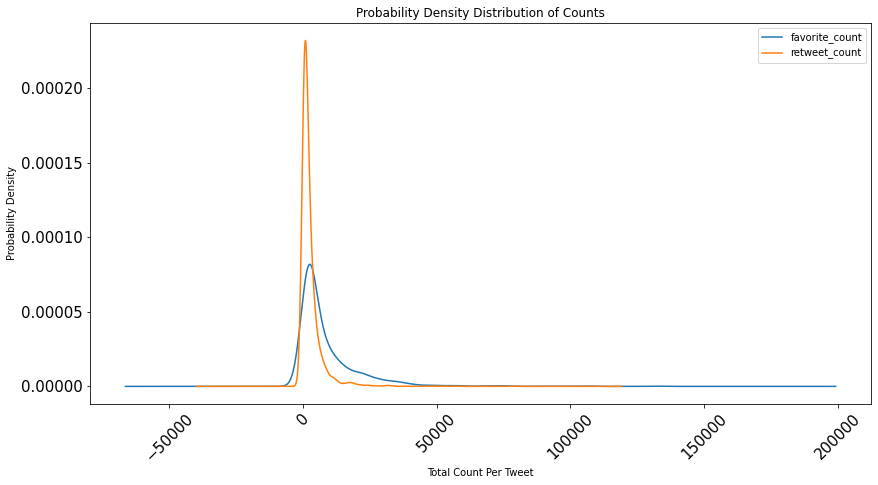

In [52]:
favourite_retweet = dataset[['favorite_count','retweet_count']]
favourite_retweet.plot(kind='kde',rot='45', grid=False, fontsize=15,figsize=(14,7),title='Probability Density Distribution of Counts')
plt.xlabel('Total Count Per Tweet')
plt.ylabel('Probability Density')


From the probability density plot above, we can see:

1. Both counts peak close to zero. By far the most likely count is a number close to 0 counts.
2. The favourite count is more likely to be greater than the retweet count. In other words, users are more likely to favourite tweets than to retweet them. This may be because retweeting is a public effort and shows up on your profile.

How strong is this correlation, then?

In [53]:
correlation1 = np.corrcoef(dataset['favorite_count'], dataset['retweet_count'])
correlation = correlation1[0][1]

In [54]:
correlation

0.9116893197500379

The correlation between the counts is 0.912 (3 s.f.). This is very high!

Next, I wanted to investigate the distribution of the rating. It may follow a normal distribution. A normal distribution is what we would expect of most types of (meaningful) rating in other areas of data. 

Let's look at the unique values and counts of each unique value in the column:

In [55]:
dataset['rating_numerator'].value_counts()

12.00      500
10.00      443
11.00      426
13.00      309
9.00       156
8.00        98
7.00        53
14.00       44
5.00        34
6.00        32
3.00        19
4.00        15
2.00         9
1.00         7
0.00         2
420.00       2
9.50         1
84.00        1
165.00       1
60.00        1
88.00        1
182.00       1
99.00        1
11.27        1
1776.00      1
13.50        1
15.00        1
80.00        1
17.00        1
144.00       1
121.00       1
11.26        1
204.00       1
9.75         1
45.00        1
666.00       1
44.00        1
143.00       1
Name: rating_numerator, dtype: int64

There are a few ratings which are very high or very low, but the majority are the region [9.0-14.0]. The ratings are continuous data - earlier we extracted decimal ratings.

In [56]:
dataset['rating_numerator'].describe()

count    2171.000000
mean       12.731589
std        43.194809
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max      1776.000000
Name: rating_numerator, dtype: float64

The mean rating is around 12.73. The quartiles show that the majority of the data actually lies in the region [10.0-12.0]. This shows the very large ratings (e.g. the max rating of 1776) likely skew the data to the right. They may need to be removed as they appear to be outliers. Outliers also explain the shape of the histogram plotted above.

In [57]:
# Selecting all rows in the dataset where the rating numerator is less than or equal to 15.0
rating_num = dataset[(dataset['rating_numerator']) <= 15.0]['rating_numerator']

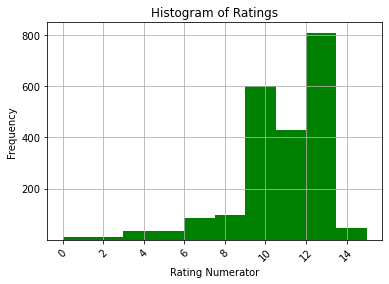

In [58]:
# removing outliers and plotting a histogram to see the distribution
rating_num.plot(kind='hist', rot=45, title='Histogram of Ratings',color='g')
plt.xlabel('Rating Numerator')
plt.yticks([200,400,600,800])
plt.grid()
plt.show()

The distribution appears to be bimodal. It is also skewed to the right - it is more common to see very low ratings than very high ratings. Most ratings cluster around 9-13.0. 

Increasing the number of bins, so that the number of bins matches the number of possible ratings, allows the bimodality to be examined more closely:

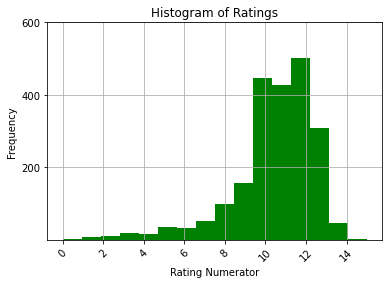

In [59]:
rating_num.plot(kind='hist', rot=45, title='Histogram of Ratings',color='g', bins=16)
plt.xlabel('Rating Numerator')
plt.yticks([200,400,600])
plt.grid()
plt.show()

The distribution now appears to be skewed to the right, but not so bimodal! This visualization is more reliable as it includes one bar per rating (that is, ratings which are integers), so each rating's frequency is clearly seen.

The most common rating is 12.0, followed by ratings around 10.0. The histogram drops away sharply for ratings above 13.0, indicating that this is possibly perceived as an upper limit by most WeRateDogs users. 

We can check this last observation by increasing the upper bound of the ratings:

In [60]:
rating_nums = dataset[(dataset['rating_numerator']) <= 22.0]['rating_numerator']

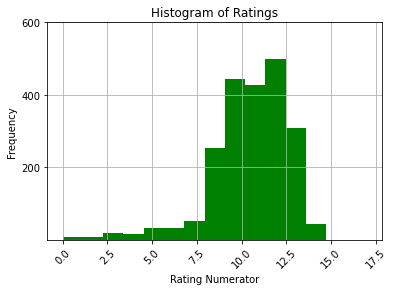

In [61]:
rating_nums.plot(kind='hist', rot=45, title='Histogram of Ratings',color='g', bins=15)
plt.xlabel('Rating Numerator')
plt.yticks([200,400,600])
plt.grid()
plt.show()

The perceived upper bound is still around 13.0. This confirms the previous observation. Also, the distribution is still skewed to the right, ruling out (again) a normal distribution.

*Question: What is the distribution of tweet lengths (defined as character count),and how does the length of a tweet relate to any of the variables investigated earlier?*

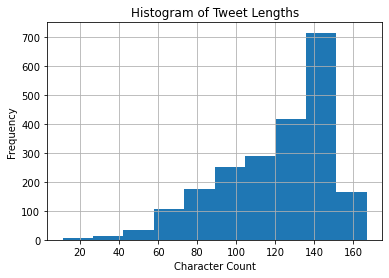

In [62]:
# Finding the lengths (character count) of tweets
dataset['Character Count'] = dataset.full_text.str.len()
dataset['Character Count'].hist()
plt.title('Histogram of Tweet Lengths')
plt.xlabel('Character Count')
plt.ylabel('Frequency')
plt.show()

The distribution is skewed to the right! Also, there appear to be some tweets which exceed the character limit of 140, which is interesting. 

Let us see if character count relates to any of the other variables. Can it be used to predict any of them?

Text(0.5, 0.98, 'Scatter Matrix of character count against other variables')

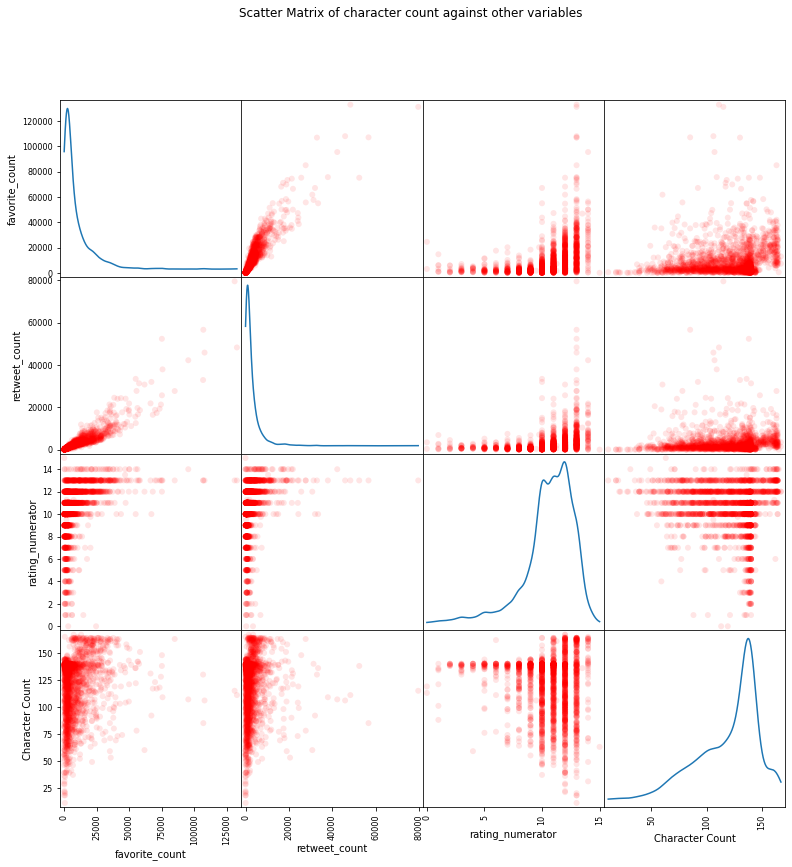

In [63]:
feature = ['favorite_count', 'retweet_count', 'rating_numerator', 'Character Count']
# Dropping outliers from the rating numerator column
dataset = dataset[dataset['rating_numerator'] <=15.0]
scatter_matrix(dataset[feature], figsize=(13,13), color='r', marker='o', grid=True, diagonal='kde', alpha=0.1)
plt.suptitle('Scatter Matrix of character count against other variables')

And there appears to be very little relationship between character count and the other variables. It appears the content of the tweet will be more important than its length.

However, since rating numerator is more or less categorical, and character count is continuous, a box plot may reveal a pattern.

Text(0.5, 1.0, 'Box Plot of Ratings and Character Count')

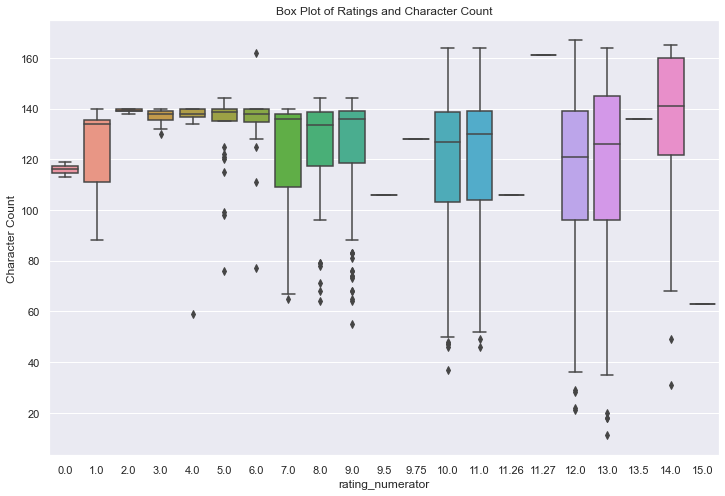

In [64]:
import seaborn as sns
sns.set(rc= {"figure.figsize": (12,8)})
sns.boxplot(y='Character Count', x='rating_numerator', data=dataset)
plt.title('Box Plot of Ratings and Character Count')

Once more, no clear relationship can be inferred.